## Contents
    1. Importing libraries and data
    2. Subsetting, wrangling, and cleaning time-series data
    3. Time series analysis: decomposition
    4. Testing for stationarity
    5. Stationarizing the data
    6. Exporting data

# 01. Importing libraries and data

In [1]:
#Importing libraries
import quandl
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import warnings
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [2]:
#Importing data (Couldn't find relevant data in Quandl, so I will just reformat the existing data)
path=r'C:\Users\munav\Desktop\bootcamps\Achievement 6\US Car Accidents'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'US_Car_Accidents_clean.pkl'))

In [3]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,...,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,...,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,...,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,...,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,...,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0


In [4]:
df.shape

(2304260, 37)

# 02. Subsetting, wrangling, and cleaning time-series data

#### I've chosen monthly accidents numbers as a time series data since it is the most relevant data for my project.

In [5]:
#Replacing outliers with nan
df.loc[df['Temperature(F)']>170,'Temperature(F)']=np.nan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304260 entries, 0 to 2304259
Data columns (total 37 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int8          
 2   Start_Time         datetime64[ns]
 3   Start_Lat          float64       
 4   Start_Lng          float64       
 5   Distance(mi)       float32       
 6   City               object        
 7   County             object        
 8   State              object        
 9   Temperature(F)     float32       
 10  Humidity(%)        float32       
 11  Pressure(in)       float32       
 12  Visibility(mi)     float32       
 13  Wind_Direction     object        
 14  Wind_Speed(mph)    float64       
 15  Precipitation(in)  float32       
 16  Weather_Condition  object        
 17  Amenity            bool          
 18  Bump               bool          
 19  Crossing           bool          
 20  Give_Way           bool 

In [7]:
#Subsetting monthly car accidents data
sub=df.groupby(['Year'])['Month'].value_counts().reset_index(name='Total_accidents')

In [8]:
sub.shape

(72, 3)

In [9]:
sub.head()

,Year,Month,Total_accidents
0,2016,12,16599
1,2016,11,16212
2,2016,8,15932
3,2016,10,15184
4,2016,9,13545


In [10]:
sub['Month']=sub['Month'].replace({'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'Novemeber', '12':'December'})

In [11]:
#Combining year and month
sub['Date'] = pd.to_datetime(sub[['Year', 'Month']].assign(DAY=1))
sub=sub.drop(columns=['Year', 'Month'])
sub['Date']=sub['Date'].astype('datetime64')
sub.head()

,Total_accidents,Date
0,16599,2016-12-01
1,16212,2016-11-01
2,15932,2016-08-01
3,15184,2016-10-01
4,13545,2016-09-01


In [12]:
sub.set_index('Date', inplace=True)

In [13]:
sub.sort_index( inplace=True)

In [14]:
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

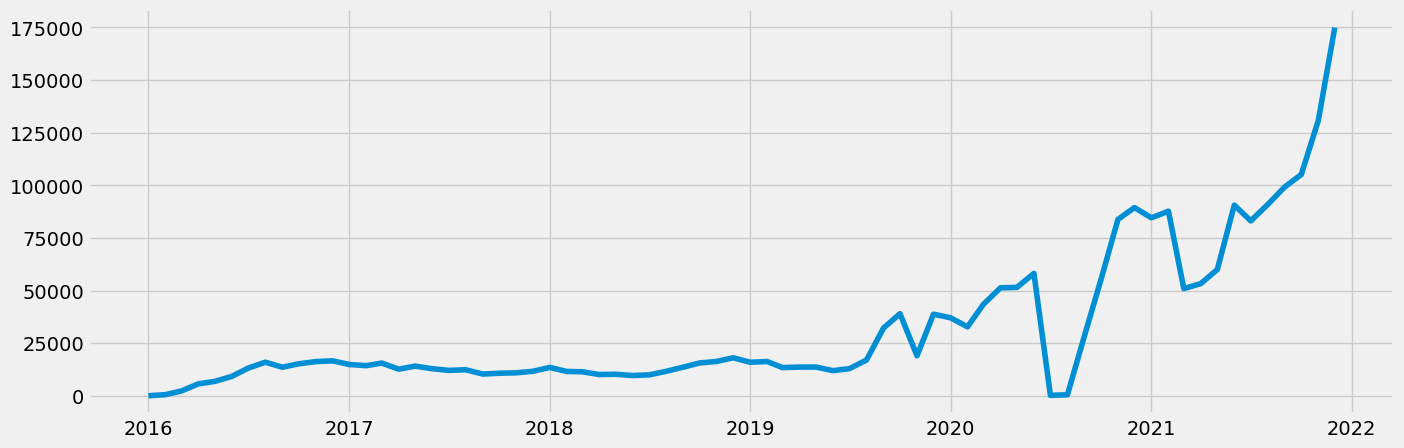

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(sub )

# 03. Time series analysis: decomposition

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub, model='additive')

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

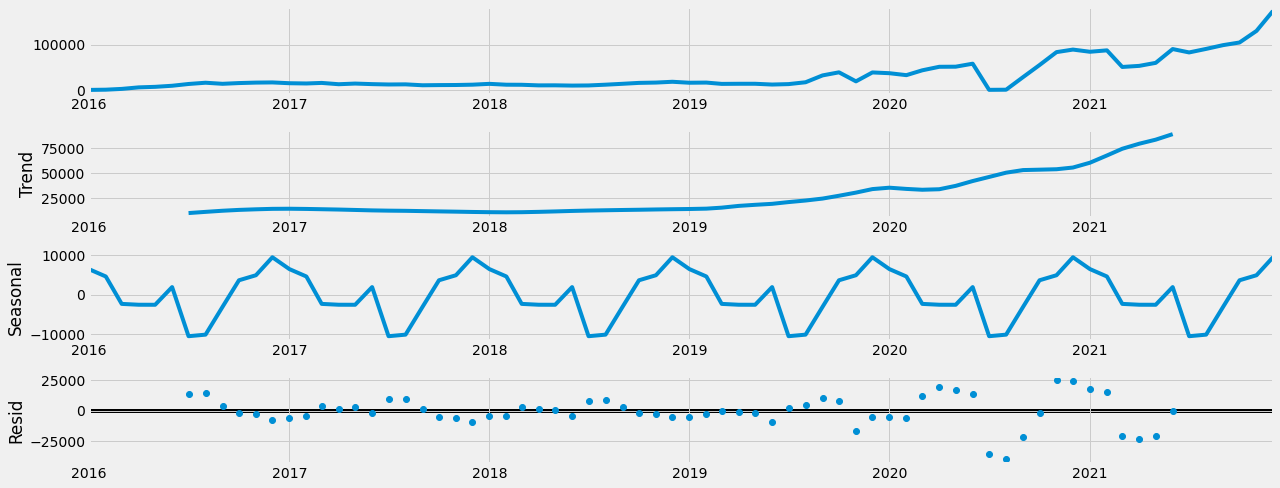

In [18]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The decomposition has shown that there is an upward trend in the number of monthly car accidents in US starting from 2018. It could be partly explained by the fact that the providers started providing significantly more data starting from 2020.

#### There is an obvious seasonality in the data, where the number of car accidents increase during autumn-winter seasons and decrease during spring-summer seasons.

#### The residual line shows that there's some unexplained noise in the data which becomes bigger starting from 2020. It could also be partly explained by the fact that the providers started providing significantly more data starting from 2020.

# 04. Testing for stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['Total_accidents'])

Dickey-Fuller Stationarity test:
Test Statistic                  3.917929
p-value                         1.000000
Number of Lags Used            12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


#### We performed the Dickey-Fuller test, which is a statistical test that checks for the presence of a unit root. A unit root is any random jump that can’t be explained by variation in the data. The hypothesis tested:

#### H0 = Presence of a unit root (non-stationary)  

#### The test statistic of 3.917929 is larger than the critical value (5%) of -2.911939, meaning the null hypothesis cannot be rejected. 

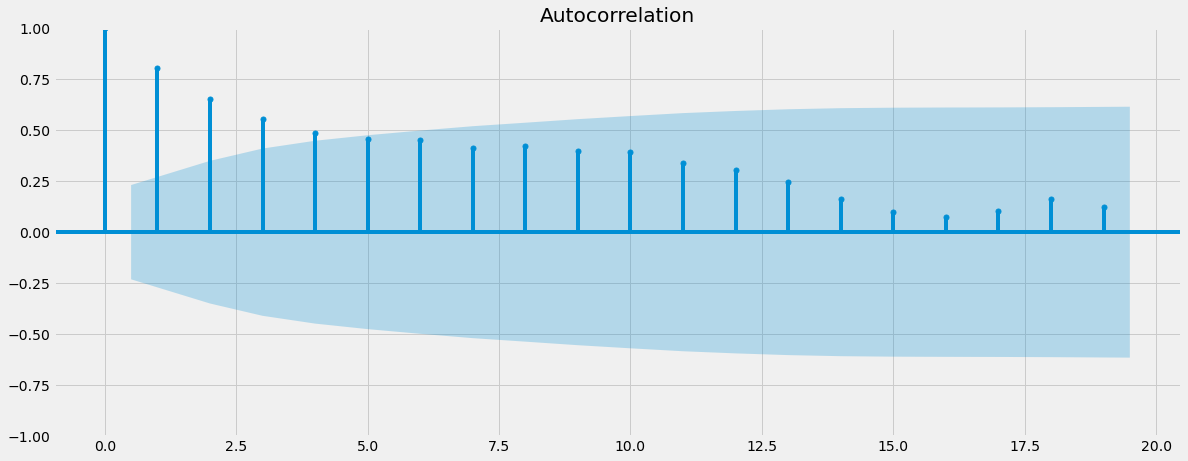

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, we import the autocorrelation and partial correlation plots

plot_acf(sub)
plt.show()

#### The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means data has lags that are significantly correlated with each other. Seeing that in the above graph there are several lags beyond this interval, we can deduce that the data is non-stationary.

# 05. Stationarizing the data

In [21]:
#diff= sub - sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1).
#This is the first method to stationarize data. We will employ logarithmic method.

In [25]:
#Logarithmic transformation of the data
sub['Total_accidents']=np.log10(sub['Total_accidents'])
sub.head()

,Total_accidents
Date,
2016-01-01,0.000000
2016-02-01,2.710117
2016-03-01,3.351796
2016-04-01,3.751279
2016-05-01,3.833848


In [26]:
sub.columns

Index(['Total_accidents'], dtype='object')

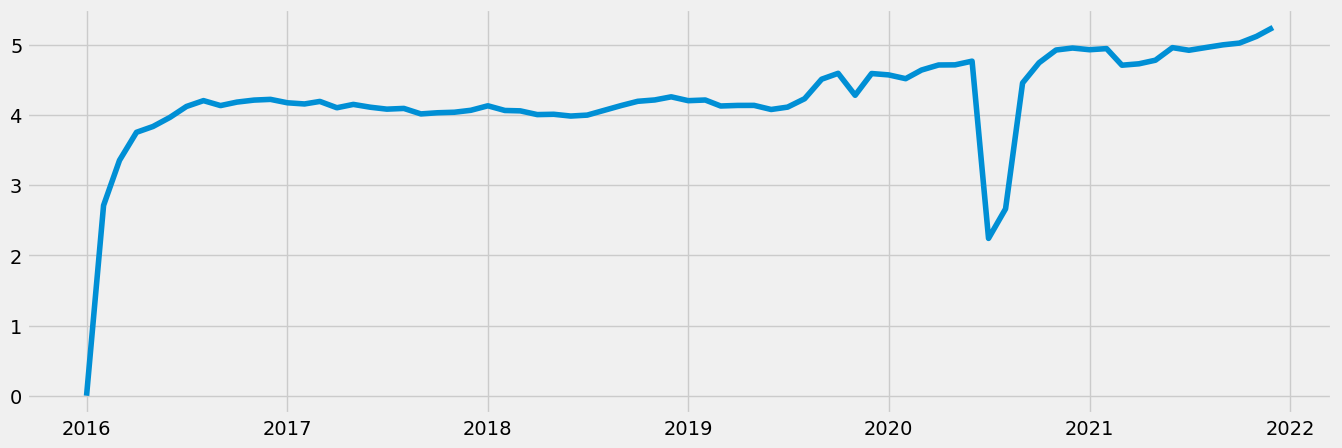

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub)

In [28]:
#Performing Dickey-Fuller test again
dickey_fuller(sub)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.864182
p-value                         0.002315
Number of Lags Used             2.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


#### This time, test statistic is smaller tha critical value(1%) of  -3.528890, so we can reject the null hypothesis at 1% significance level. 

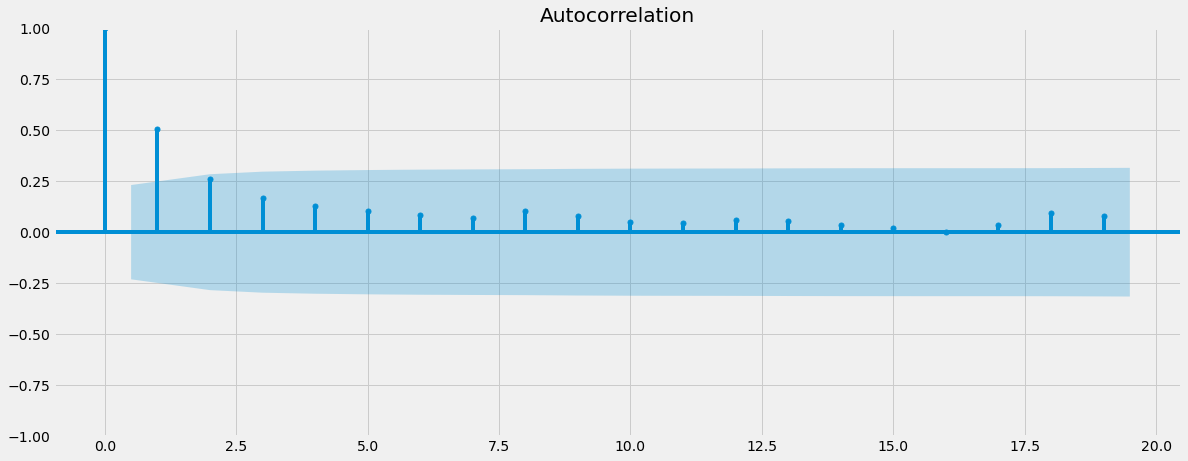

In [29]:
# Checking autocorrelation
plot_acf(sub)
plt.show()

#### We can see that the number of autocorrelated lags has substantially decreased, although there are 2 lags left.  This means that, despite the Dickey-Fuller test saying that the data is stationary, that stationarity is weak. 